In [1]:
# Dependencies
import us
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
#import seaborn as sns
import scipy.stats as st

# Import census api key
census_key = os.environ.get('census_api_key')
c = Census(census_key, year = 2016)

# Import Google API key
g_key = os.environ.get('g_key')

In [2]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
ed_data = c.acs5.get(("NAME", 'B01003_001E', 'B15003_002E', 'B15003_017E', 
                              'B15003_018E', 'B15003_021E', 'B15003_022E',
                              'B15003_023E', 'B15003_024E', 'B15003_025E'), {'for': 'state:*'})
# Convert to DataFrame
ed_df = pd.DataFrame(ed_data)
ed_df

,NAME,B01003_001E,B15003_002E,B15003_017E,B15003_018E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,state
0,Alabama,4841164.0,42577.0,828205.0,181388.0,258502.0,492382.0,208839.0,49283.0,32572.0,01
1,Alaska,736855.0,3020.0,106169.0,24342.0,39133.0,86551.0,35423.0,8522.0,5029.0,02
2,Arizona,6728577.0,62538.0,898657.0,179701.0,379207.0,777681.0,333226.0,76987.0,53531.0,04
3,Arkansas,2968472.0,23010.0,561132.0,122754.0,127004.0,273557.0,108055.0,24517.0,18317.0,05
4,California,38654206.0,673089.0,4678279.0,582625.0,1995579.0,5136043.0,2045487.0,597874.0,397083.0,06
5,Colorado,5359295.0,32415.0,639310.0,140723.0,301602.0,874953.0,376273.0,79545.0,58959.0,08
6,Connecticut,3588570.0,24315.0,593793.0,79427.0,184426.0,524370.0,300566.0,72543.0,40840.0,09
7,Delaware,934695.0,7100.0,176928.0,22533.0,49591.0,115770.0,57237.0,11650.0,10664.0,10
8,District of Columbia,659009.0,5004.0,71315.0,12052.0,14496.0,108252.0,90366.0,38536.0,19162.0,11
9,Florida,19934451.0,205055.0,3516434.0,594595.0,1348226.0,2514297.0,972529.0,285100.0,157870.0,12


In [3]:
# Column Reordering
ed_df = ed_df.rename(columns={"B01003_001E": "Population",
                              'B15003_017E': 'High_School',
                              'B15003_018E': 'GED',
                              'B15003_021E': 'Associates',
                              'B15003_022E': 'Bachelors',
                              'B15003_023E': 'Masters',
                              'B15003_024E': 'Professional',
                              'B15003_025E': 'Doctorate',
                              "NAME": "Name", 
                              'state': 'State'})
ed_df.head()

# Add in percentages 

ed_df['High_School%'] = round(((ed_df['High_School'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['GED%'] = round(((ed_df['GED'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['Associates%'] = round(((ed_df['Associates'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['Bachelors%'] = round(((ed_df['Bachelors'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['Masters%'] = round(((ed_df['Masters'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['Professional%'] = round(((ed_df['Professional'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['Doctorate%'] = round(((ed_df['Doctorate'].astype(int) / ed_df["Population"].astype(int))*100),1)

ed_df['Educated%'] = (ed_df['High_School%'] +
                         ed_df['GED%'] +
                         ed_df['Associates%'] +
                         ed_df['Bachelors%'] +
                         ed_df['Masters%'] +
                         ed_df['Professional%'] +
                         ed_df['Doctorate%'])

In [4]:
# Final DataFrame
ed_df = ed_df[['Name', "High_School%", "GED%", "Associates%", 'Bachelors%', 
               'Masters%', 'Professional%', 'Doctorate%', 'Educated%']]

ed_df.head()

,Name,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
0,Alabama,17.1,3.7,5.3,10.2,4.3,1.0,0.7,42.3
1,Alaska,14.4,3.3,5.3,11.7,4.8,1.2,0.7,41.4
2,Arizona,13.4,2.7,5.6,11.6,5.0,1.1,0.8,40.2
3,Arkansas,18.9,4.1,4.3,9.2,3.6,0.8,0.6,41.5
4,California,12.1,1.5,5.2,13.3,5.3,1.5,1.0,39.9


In [13]:
print(ed_df['Educated%'].max())
print(ed_df['Educated%'].min())

53.599999999999994
37.4


In [6]:
# Need to get the state abbreviations for the state name.
# imported us and then get the states mapping for state name and the abbreviation
states = us.states.mapping('abbr', 'name')
states = {state: abbrev for abbrev, state in states.items()}

# add the state column to the ed_df with the state abbreviation, this is added as the last column to the dataframe
ed_df['State'] = ed_df['Name'].map(states)

# to move state column from last to first  
cols = list(ed_df.columns)
cols = [cols[-1]] + cols[:-1]
ed_df = ed_df[cols]
ed_df.head()

,State,Name,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
0,AL,Alabama,17.1,3.7,5.3,10.2,4.3,1.0,0.7,42.3
1,AK,Alaska,14.4,3.3,5.3,11.7,4.8,1.2,0.7,41.4
2,AZ,Arizona,13.4,2.7,5.6,11.6,5.0,1.1,0.8,40.2
3,AR,Arkansas,18.9,4.1,4.3,9.2,3.6,0.8,0.6,41.5
4,CA,California,12.1,1.5,5.2,13.3,5.3,1.5,1.0,39.9


In [7]:
# create the dataframe for the police_killings.csv 
killings_df = pd.read_csv('police_killings.csv', dtype={'Zipcode':object})

# we don't need all the columns - so considering only few that is required for analysis
killings_df = killings_df[['State', 'City', 'Zipcode']]

killings_df.head()

,State,City,Zipcode
0,AZ,Globe,85501
1,AR,Memphis,38103
2,NE,Omaha,68110
3,WA,Federal Way,98003
4,MO,Chesterfield,63005


In [8]:
# create the state group to be able to merge with ed_df
state_grp = killings_df.groupby('State').size().to_frame('count')
state_grp_df = pd.DataFrame(state_grp).reset_index()
state_grp_df

,State,count
0,AK,41
1,AL,138
2,AR,103
3,AZ,343
4,CA,1186
5,CO,227
6,CT,36
7,DC,26
8,DE,20
9,FL,540


In [9]:
# merge the dataframes to find the ralationship between killings and education
merged_df = pd.merge(state_grp_df, ed_df, how='inner', on=['State', 'State'])
merged_df

,State,count,Name,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
0,AK,41,Alaska,14.4,3.3,5.3,11.7,4.8,1.2,0.7,41.4
1,AL,138,Alabama,17.1,3.7,5.3,10.2,4.3,1.0,0.7,42.3
2,AR,103,Arkansas,18.9,4.1,4.3,9.2,3.6,0.8,0.6,41.5
3,AZ,343,Arizona,13.4,2.7,5.6,11.6,5.0,1.1,0.8,40.2
4,CA,1186,California,12.1,1.5,5.2,13.3,5.3,1.5,1.0,39.9
5,CO,227,Colorado,11.9,2.6,5.6,16.3,7.0,1.5,1.1,46.0
6,CT,36,Connecticut,16.5,2.2,5.1,14.6,8.4,2.0,1.1,49.9
7,DC,26,District of Columbia,10.8,1.8,2.2,16.4,13.7,5.8,2.9,53.6
8,DE,20,Delaware,18.9,2.4,5.3,12.4,6.1,1.2,1.1,47.4
9,FL,540,Florida,17.6,3.0,6.8,12.6,4.9,1.4,0.8,47.1


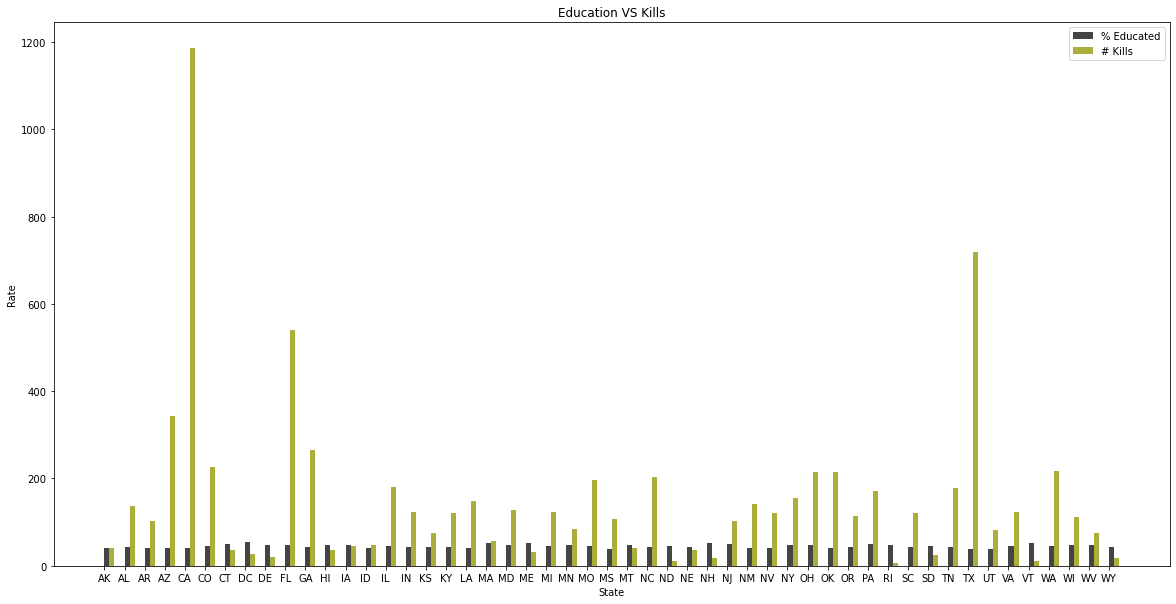

In [10]:
plt.figure(figsize=(20,10))
num_kills = merged_df['count']
educated_rate = merged_df['Educated%']
per_state = merged_df['State']

x_indexes = np.arange(len(per_state))
width = 0.25


plt.bar(x_indexes, educated_rate, width=width, color = '#444444', label='% Educated', align='edge')

plt.bar(x_indexes + width, num_kills, width=width, color='#adad3b', label='# Kills', align='edge')
plt.xlabel('State')
plt.ylabel('Rate')
plt.title('Education VS Kills')
plt.legend()
plt.xticks(ticks=x_indexes, labels=per_state)
plt.show()

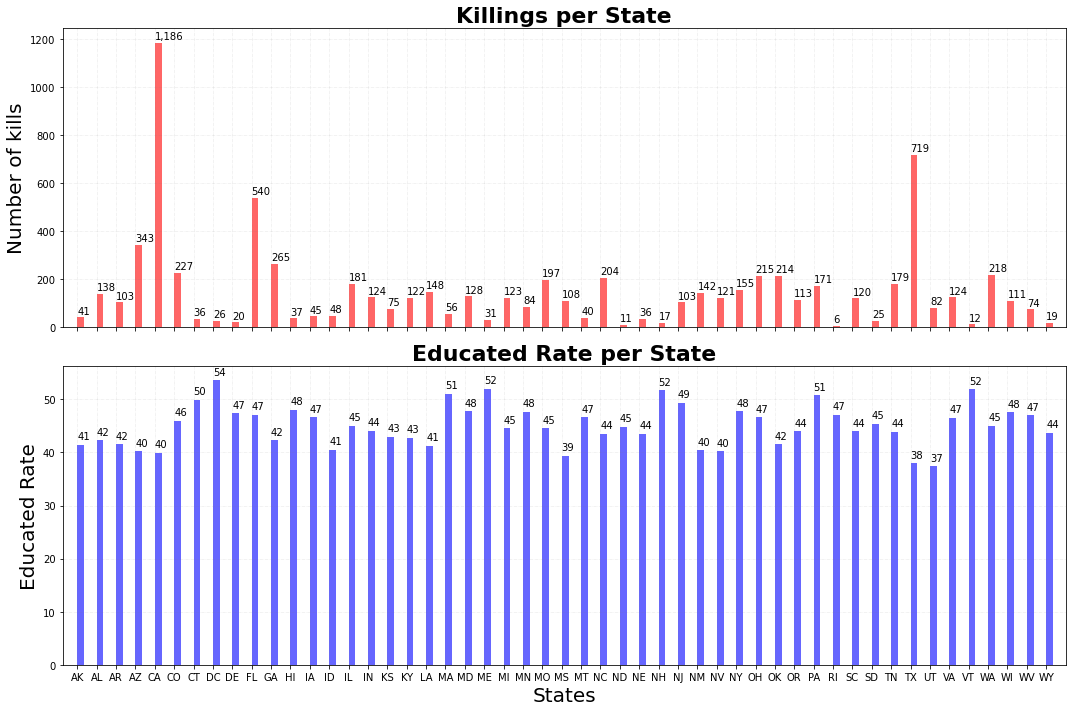

In [11]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,10))
ax1.bar(per_state, num_kills, color='r', alpha=0.6, align='edge', width=0.35)
ax2.bar(per_state, educated_rate, color='b', alpha=0.6, align='edge', width=0.35)
ax1.set_title('Killings per State', fontweight="bold", size=22)
ax1.set_ylabel('Number of kills', fontsize = 20)

ax2.set_title('Educated Rate per State', fontweight="bold", size=22)
ax2.set_xlabel('States', fontsize = 20)
ax2.set_ylabel('Educated Rate', fontsize = 20)

ax1.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

ax2.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

for p in ax1.patches:
    percentage ='{:,.0f}'.format(p.get_height())
    #percentage = '{.0f:}'.format(p.get.height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()
    y=p.get_y()+height+15
    ax1.annotate(percentage,(x,y))

for p in ax2.patches:
    percentage ='{:,.0f}'.format(p.get_height())
    #percentage = '{.0f:}'.format(p.get.height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()
    y=p.get_y()+height+1
    ax2.annotate(percentage,(x,y))
    
plt.xlim(-0.75, len(per_state))
plt.tight_layout()
plt.show()


The r-squared is: -0.374310711427008


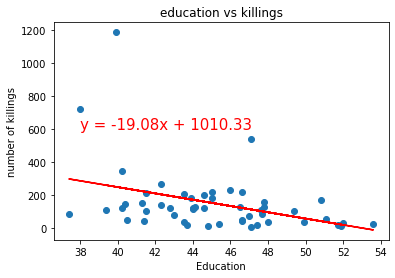

In [12]:
x_values = merged_df['Educated%']
y_values = merged_df['count']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('education vs killings')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
text_coordinates = (38,600)
plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
plt.xlabel("Education")
plt.ylabel('number of killings')
print(f"The r-squared is: {rvalue}")
plt.show()

In [62]:
zip_grp = killings_df.groupby(['Zipcode','State']).size().to_frame('count')
zip_grp_df = pd.DataFrame(zip_grp).reset_index()
zip_grp_df

,Zipcode,State,count
0,10002,NY,1
1,10009,NY,1
2,10014,NY,1
3,10019,NY,1
4,10021,NY,1
...,...,...,...
4971,99705,AK,2
4972,99709,AK,2
4973,99712,AK,2
4974,99723,AK,1


In [64]:
# merge the dataframes to find the ralationship between killings and education
merged_zip_df = pd.merge(zip_grp_df, ed_df, how='inner', on=['State', 'State'])
merged_zip_df

,Zipcode,State,count,Name,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
0,10002,NY,1,New York,15.5,2.6,5.9,13.5,7.4,1.9,1.0,47.8
1,10009,NY,1,New York,15.5,2.6,5.9,13.5,7.4,1.9,1.0,47.8
2,10014,NY,1,New York,15.5,2.6,5.9,13.5,7.4,1.9,1.0,47.8
3,10019,NY,1,New York,15.5,2.6,5.9,13.5,7.4,1.9,1.0,47.8
4,10021,NY,1,New York,15.5,2.6,5.9,13.5,7.4,1.9,1.0,47.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,99344,WA,1,Washington,12.9,2.7,6.6,14.5,5.9,1.4,1.0,45.0
4972,99350,WA,1,Washington,12.9,2.7,6.6,14.5,5.9,1.4,1.0,45.0
4973,99352,WA,1,Washington,12.9,2.7,6.6,14.5,5.9,1.4,1.0,45.0
4974,99353,WA,1,Washington,12.9,2.7,6.6,14.5,5.9,1.4,1.0,45.0


In [68]:
nan_df = merged_zip_df[merged_zip_df.isna().any(axis=1)]
display(nan_df)

,Zipcode,State,count,Name,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%


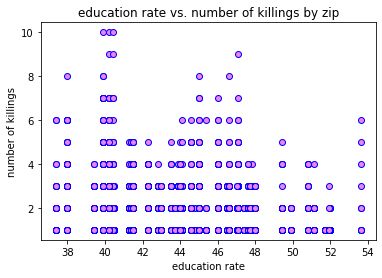

In [93]:
plt_kill = merged_zip_df["count"]
plt_ed_rate = merged_zip_df["Educated%"]
plt.scatter(plt_ed_rate,plt_kill,marker="o", facecolors="violet", edgecolors="blue")
plt.title('education rate vs. number of killings by zip')
plt.xlabel('education rate')
plt.ylabel('number of killings')
plt.show()

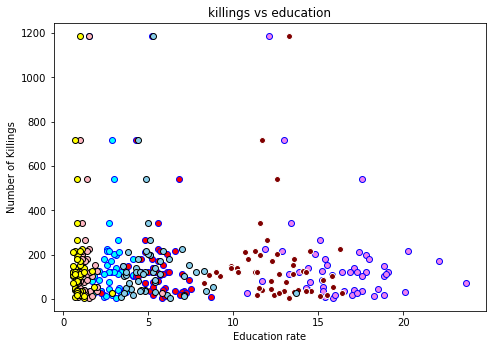

In [109]:
plt_killings = merged_df["count"]
plt_high_school = merged_df["High_School%"]
plt_ged = merged_df["GED%"]
plt_associates = merged_df["Associates%"]
plt_bachelors = merged_df['Bachelors%']
plt_masters = merged_df['Masters%']
plt_professional = merged_df['Professional%']
plt_doctorate = merged_df['Doctorate%']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(plt_high_school, plt_killings, marker="o", facecolors="violet", edgecolors="blue")
ax.scatter(plt_ged, plt_killings, marker="o", facecolors="cyan", edgecolors="blue")
ax.scatter(plt_associates, plt_killings, marker="o", facecolors="red", edgecolors="blue")
ax.scatter(plt_bachelors, plt_killings, marker="o", facecolors="maroon", edgecolors="white")
ax.scatter(plt_masters, plt_killings, marker="o", facecolors="skyblue", edgecolors="black")
ax.scatter(plt_professional, plt_killings, marker="o", facecolors="lightpink", edgecolors="black")
ax.scatter(plt_doctorate, plt_killings, marker="o", facecolors="yellow", edgecolors="black")
ax.set_xlabel('Education rate')
ax.set_ylabel('Number of Killings')
ax.set_title('killings vs education')

plt.show()